In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Loading the Dataset
df = pd.read_csv("aqi_data.csv", parse_dates=['Date'])
df = df.sort_values(by="Date")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), float

In [4]:
# Printing Sample data
print("Sample Data (first 5 rows):")
df.head()

Sample Data (first 5 rows):


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN


In [5]:
print("Sample Data (last 5 rows):")
df.tail()

Sample Data (last 5 rows):


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
3072,Amaravati,2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
26956,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,NaN,NaN,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,NaN,NaN,NaN,41.0,Good
7833,Chandigarh,2020-07-01,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [6]:
# Data Cleaning
# Handling missing values (forward fill + mean imputation as fallback)
df.fillna(method="ffill", inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
# Ensuring no missing values left
print("Missing values:\n", df.isnull().sum())

Missing values:
 City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    2
dtype: int64


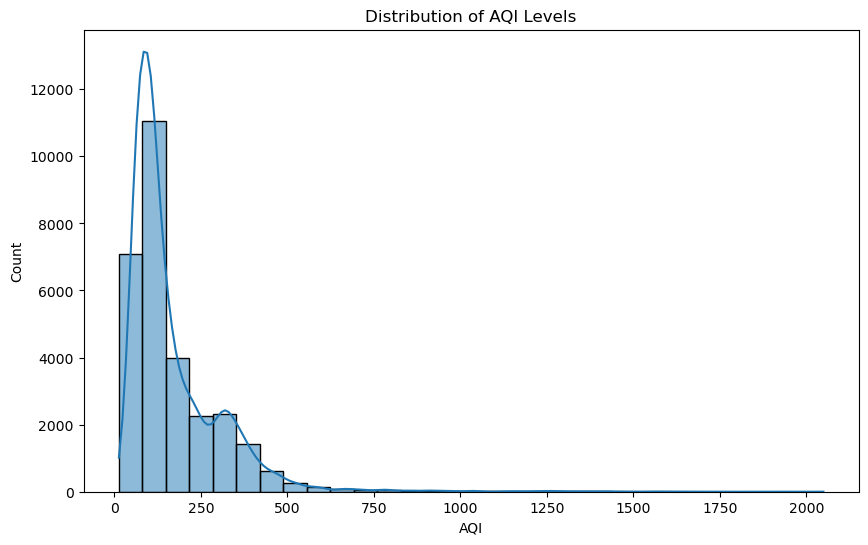

In [7]:
# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(df["AQI"], bins=30, kde=True)
plt.title("Distribution of AQI Levels")
plt.show()

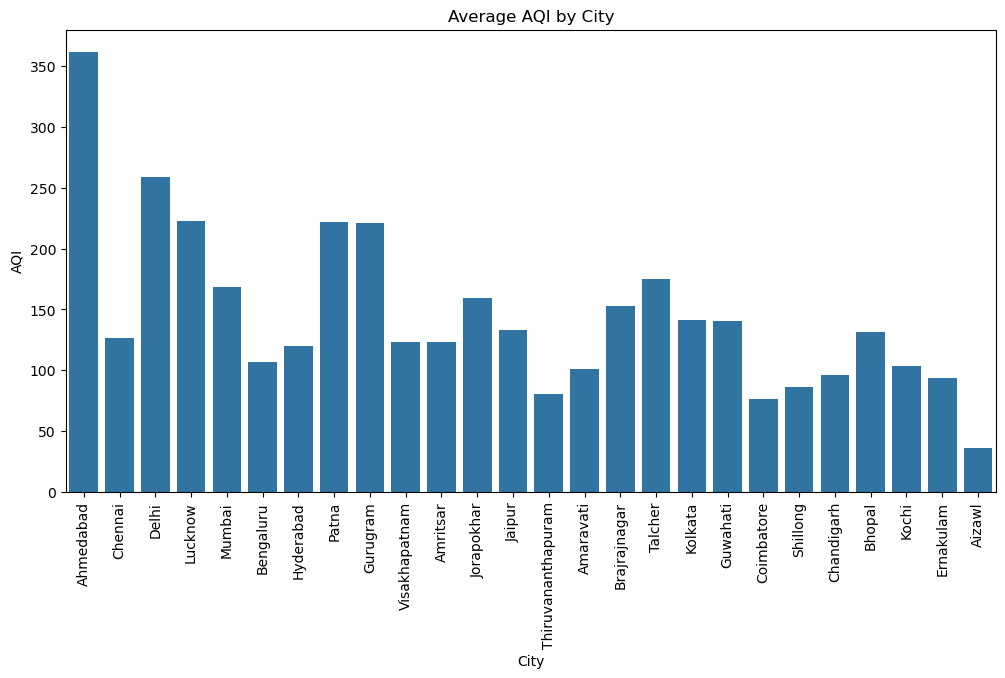

In [8]:
# City-wise average AQI
plt.figure(figsize=(12,6))
sns.barplot(x="City", y="AQI", data=df, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title("Average AQI by City")
plt.show()

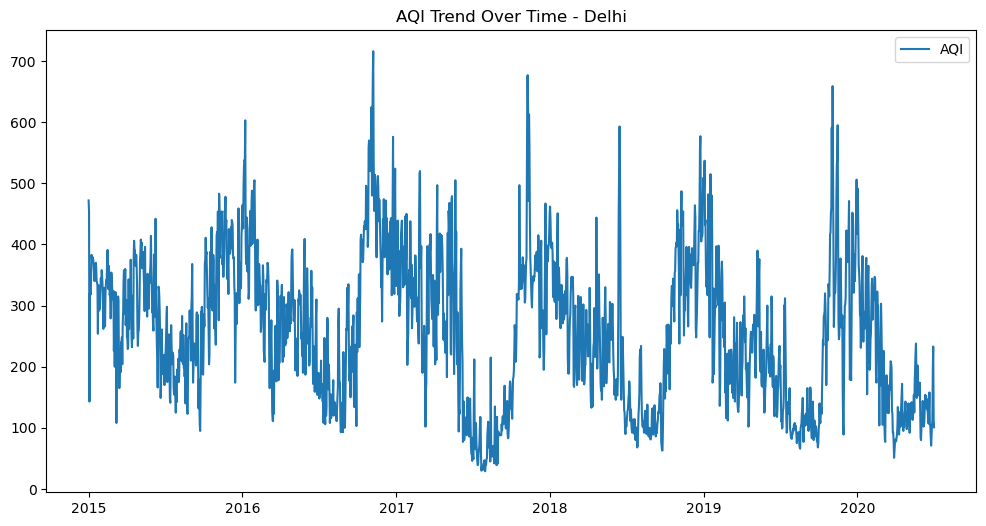

In [9]:
# Seasonal trend (example: Delhi)
city = "Delhi"
delhi_data = df[df["City"]==city].groupby("Date")["AQI"].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(delhi_data["Date"], delhi_data["AQI"], label="AQI")
plt.title(f"AQI Trend Over Time - {city}")
plt.legend()
plt.show()

C:\Users\Nilanjana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Nilanjana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Nilanjana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


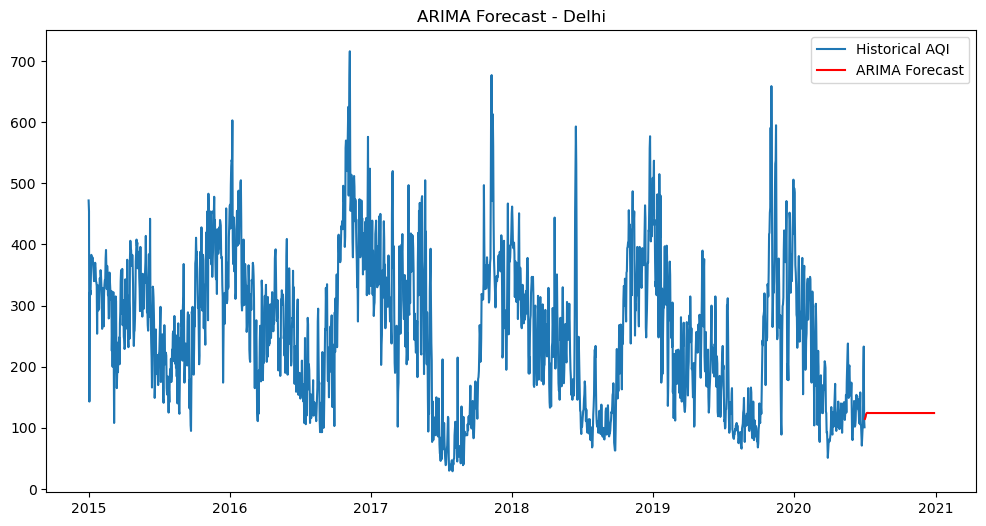

In [10]:
# Forecasting with ARIMA
series = delhi_data.set_index("Date")["AQI"]
# Fit ARIMA model
arima_model = ARIMA(series, order=(5,1,2))
arima_result = arima_model.fit()
# Forecasting next 180 days
forecast_arima = arima_result.forecast(steps=180)
plt.figure(figsize=(12,6))
plt.plot(series, label="Historical AQI")
plt.plot(forecast_arima.index, forecast_arima, label="ARIMA Forecast", color="red")
plt.title(f"ARIMA Forecast - {city}")
plt.legend()
plt.show()

17:11:15 - cmdstanpy - INFO - Chain [1] start processing
17:11:15 - cmdstanpy - INFO - Chain [1] done processing


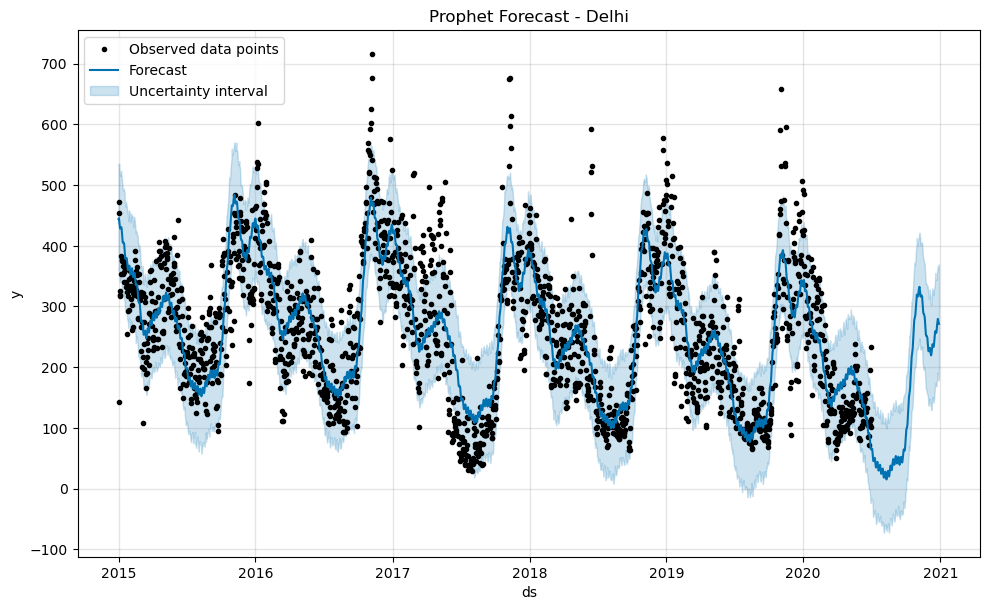

In [11]:
# Forecasting with Prophet
prophet_data = delhi_data.rename(columns={"Date": "ds", "AQI": "y"})
model = Prophet()
model.fit(prophet_data)
future = model.make_future_dataframe(periods=180)
forecast_prophet = model.predict(future)
model.plot(forecast_prophet)
plt.title(f"Prophet Forecast - {city}")
plt.legend()
plt.show()

In [12]:
# Model Comparison
# Train-test split (last 6 months for test)
train = series[:-180]
test = series[-180:]

# ARIMA
arima_model = ARIMA(train, order=(5,1,2))
arima_result = arima_model.fit()
pred_arima = arima_result.forecast(steps=len(test))

C:\Users\Nilanjana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Nilanjana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Nilanjana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [13]:
# Prophet
train_prophet = prophet_data[:-180]
test_prophet = prophet_data[-180:]
model = Prophet()
model.fit(train_prophet)
future = model.make_future_dataframe(periods=len(test))
forecast_prophet = model.predict(future)
pred_prophet = forecast_prophet.iloc[-len(test):]["yhat"].values

17:11:18 - cmdstanpy - INFO - Chain [1] start processing
17:11:18 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Error comparison
print("ARIMA MAE:", mean_absolute_error(test, pred_arima))
print("Prophet MAE:", mean_absolute_error(test_prophet["y"], pred_prophet))

ARIMA MAE: 238.87596987423314
Prophet MAE: 75.30569949396241


In [15]:
# Extracting Insights
print("High-risk zones (Top cities by AQI):")
print(df.groupby("City")["AQI"].mean().sort_values(ascending=False).head())

High-risk zones (Top cities by AQI):
City
Ahmedabad    362.022938
Delhi        258.732703
Lucknow      222.351419
Patna        221.411733
Gurugram     221.019655
Name: AQI, dtype: float64


In [16]:
# Policy & Health Recommendations per Unique City
# Functions for recommendations
def policy_recommendations(aqi):
    if aqi <= 50:
        return "Good: No interventions required. Maintain current policies."
    elif aqi <= 100:
        return "Satisfactory: Promote tree plantation and awareness programs."
    elif aqi <= 200:
        return "Moderate: Encourage public transport, restrict waste burning."
    elif aqi <= 300:
        return "Poor: Implement odd-even traffic rules, curb industrial emissions."
    elif aqi <= 400:
        return "Very Poor: Issue health advisories, restrict construction activities."
    else:
        return "Severe: Emergency measures, close schools, halt non-essential industries."

def health_advisory(aqi):
    if aqi <= 50:
        return "Air quality is safe. Enjoy outdoor activities."
    elif aqi <= 100:
        return "Sensitive groups should take caution. Stay hydrated."
    elif aqi <= 200:
        return "Limit outdoor activity. Use masks if sensitive."
    elif aqi <= 300:
        return "Wear N95 masks. Avoid jogging/walking outside."
    elif aqi <= 400:
        return "Stay indoors. Air purifiers recommended."
    else:
        return "Emergency: Avoid going outside, use N95 masks, seek medical advice if unwell."

# Compute average AQI for each city
city_summary = (
    df.groupby("City")["AQI"]
    .mean()
    .reset_index()
    .rename(columns={"AQI": "Average_AQI"})
)

# Apply recommendations
city_summary["Policy_Recommendation"] = city_summary["Average_AQI"].apply(policy_recommendations)
city_summary["Health_Advisory"] = city_summary["Average_AQI"].apply(health_advisory)

# Show full recommendations
pd.set_option('display.max_colwidth', None)
city_summary

,City,Average_AQI,Policy_Recommendation,Health_Advisory
0,Ahmedabad,362.022938,"Very Poor: Issue health advisories, restrict construction activities.",Stay indoors. Air purifiers recommended.
1,Aizawl,35.690265,Good: No interventions required. Maintain current policies.,Air quality is safe. Enjoy outdoor activities.
2,Amaravati,100.492114,"Moderate: Encourage public transport, restrict waste burning.",Limit outdoor activity. Use masks if sensitive.
3,Amritsar,123.438165,"Moderate: Encourage public transport, restrict waste burning.",Limit outdoor activity. Use masks if sensitive.
4,Bengaluru,106.289199,"Moderate: Encourage public transport, restrict waste burning.",Limit outdoor activity. Use masks if sensitive.
5,Bhopal,131.501730,"Moderate: Encourage public transport, restrict waste burning.",Limit outdoor activity. Use masks if sensitive.
6,Brajrajnagar,153.013859,"Moderate: Encourage public transport, restrict waste burning.",Limit outdoor activity. Use masks if sensitive.
7,Chandigarh,96.072368,Satisfactory: Promote tree plantation and awareness programs.,Sensitive groups should take caution. Stay hydrated.
8,Chennai,126.786004,"Moderate: Encourage public transport, restrict waste burning.",Limit outdoor activity. Use masks if sensitive.
9,Coimbatore,76.344560,Satisfactory: Promote tree plantation and awareness programs.,Sensitive groups should take caution. Stay hydrated.
